In [1]:
import numpy as np
import random as rnd
import os
import re
from IPython.display import HTML, display
import matplotlib.pyplot as plt

In [2]:
languages = ['java', 'nodejs', 'go']
modes = ['no', 'off', 'on']
fig_counter = 0
root='../../../src-gen/logs'

In [3]:
def allFiles(language, mode):
    directory = os.fsencode(root + '/' + mode)
    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        if filename.split('-')[1] == language and filename.endswith('.log'): 
            yield root + '/' + mode + '/' + filename
            
def loadMemory(filename, language):
    file = open(filename)
    while True:
        line = file.readline()      
        if not line:
            break
        if language == 'go':
            line = line[20:]
        if line.startswith('#usedMem:'):
            mem = int(line[1:].strip().split(':')[1:][0])
            yield mem   
            
def loadTotalTime(filename):
    file = open(filename)
    while True:
        line = file.readline()      
        if not line:
            break                  
        if line.startswith('>done in '):
            time = line[9:-4].strip()
            return int(time)              

In [4]:
def allData(language, mode):
    all_mem = []
    all_t = []
    for filename in allFiles(language, mode):
        mem = np.array(list(loadMemory(filename, language))).astype(int).flatten()
        t = loadTotalTime(filename)
        all_mem.append(mem)
        all_t.append(t)
    return all_mem, all_t

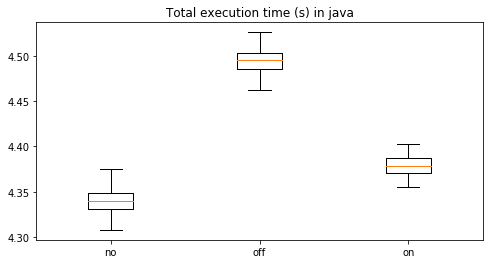

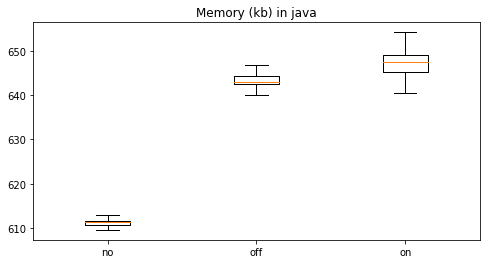

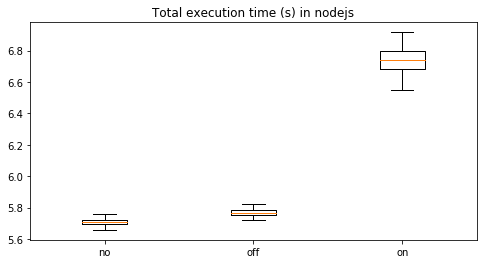

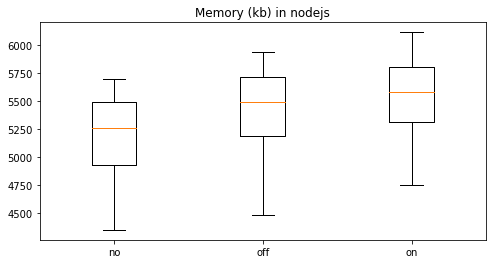

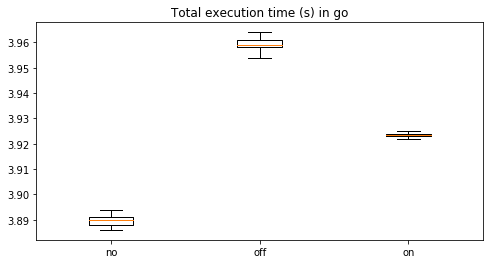

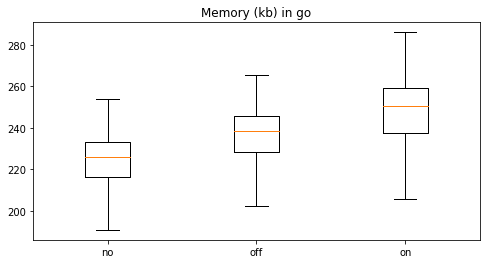

In [5]:
for language in languages:    
    global fig_counter
    
    all_t = []
    all_mem = []
    for mode in modes:
        mem, t = allData(language, mode)
        all_t.append(np.array(t).flatten()/1000)
        all_mem.append(np.array(mem).flatten()/1000)
            
    fig = plt.figure(fig_counter, figsize=(8,4))        
    plt.boxplot(all_t, 0, '')
    plt.xticks(range(1, 4), ('no', 'off', 'on'))
    plt.title('Total execution time (s) in ' + language)
    plt.show()  
    fig_counter = fig_counter + 1
    
    fig = plt.figure(fig_counter, figsize=(8,4))        
    plt.boxplot(all_mem, 0, '')
    plt.xticks(range(1, 4), ('no', 'off', 'on'))
    plt.title('Memory (kb) in ' + language)
    plt.show()  
    fig_counter = fig_counter + 1
    